<a href="https://colab.research.google.com/github/dhvanipatel000/CE090_PatelDhvaniKanubhai_ML_Labs/blob/main/ML_Lab9_CE090.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.95164831  4.28882085]
 [ 2.0720792   0.98848385]
 [-1.538563    2.91165191]]
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


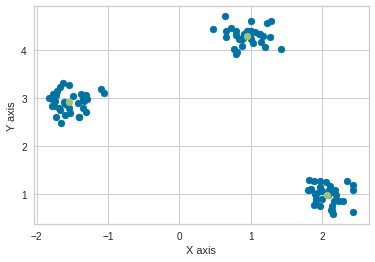

In [ ]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples=100,centers=3,n_features=2,cluster_std=0.2,random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
# centroids = (X.n_sample(n=3))
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
print(kmeans.cluster_centers_)
label=kmeans.labels_
print(label)
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, label))

0.8816040239688525


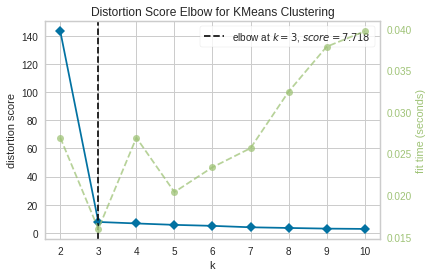

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(kmeans)
visualizer.fit(X)
visualizer.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

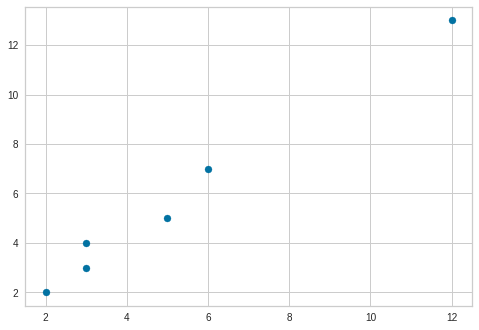

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits() #load the dataset in digits
digits.keys()
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(digits.data)
print(kmeans.labels_)


[5 7 7 ... 7 3 3]


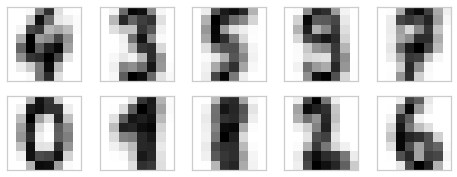

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of␣subplots( 2 rows and 5 columns)
centers = kmeans.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to␣original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8␣matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
#imshow(matplotlib method) to render the image in notebook

In [ ]:
clusters=digits.target
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)
#if a specific digit belongs to/equivalent a specific cluster then its True␣else False
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False  True False ... False False False]
[False False  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ...  True False  True]
[False False False ... False  True False]


4. Use the k-means algorithm in python to cluster the following 8 examples into 3 clusters:
A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).
(a) Suppose that the centers of each cluster are A1, A4 and A7. Run the k-means algorithm
for 3 epochs only. At the end of this epoch show:

i. The new clusters (i.e. the examples belonging to each cluster)(mention the appro-
priate attribute used to identify the clusters in sklearn)

ii. The centers of the new clusters (mention the appropriate attribute used to identify
the cluster centers in sklearn)

cluster center for 1st iteration:
 [[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


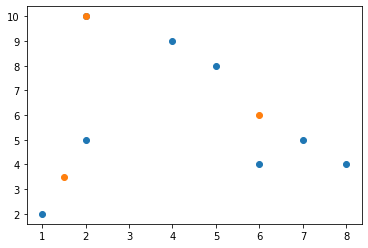

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
centroid = np.array([[2,10],[5,8],[1,2]])

kmeans = KMeans(n_clusters=3, init=centroid, max_iter=1).fit(X)
print("cluster center for 1st iteration:\n", kmeans.cluster_centers_)

c1 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c1[:,0], c1[:,1])



cluster center after 2nd iteration:
 [[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


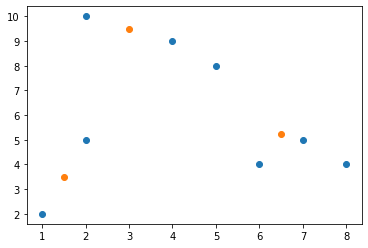

In [7]:
#2nd iteration
kmeans = KMeans(n_clusters=3, init=c1, max_iter=1).fit(X)
print("\ncluster center after 2nd iteration:\n", kmeans.cluster_centers_)

c2 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c2[:,0], c2[:,1])


cluster center after 3rd iteration:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


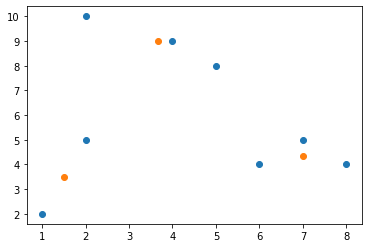

In [6]:
#3rd iteration
kmeans = KMeans(n_clusters=3, init=c2, max_iter=1).fit(X)
print("\ncluster center after 3rd iteration:\n", kmeans.cluster_centers_)

c3 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(c3[:,0], c3[:,1])